In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

In [266]:
female_file = 'female.csv'  # % Female
male_file = 'male.csv'      # Absolute male
total_file = 'total.csv'    # Total population

female_df = pd.read_csv(female_file, skiprows=4)
male_df = pd.read_csv(male_file, skiprows=4)
total_df = pd.read_csv(total_file, skiprows=4)


In [268]:
female_df = female_df.drop(columns=['Indicator Name', 'Indicator Code'], errors='ignore')
male_df = male_df.drop(columns=['Indicator Name', 'Indicator Code'], errors='ignore')
total_df = total_df.drop(columns=['Indicator Name', 'Indicator Code'], errors='ignore')


In [274]:
print("\n Reshaping (melting) datasets...")
female_melted = female_df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Female %')
male_melted = male_df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Male Population')
total_melted = total_df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Total Population')


print("\n Melted FEMALE data sample:")
print(female_melted.head())

print("\n Melted MALE data sample:")
print(male_melted.head())

print("\n Melted TOTAL data sample:")
print(total_melted.head())




 Reshaping (melting) datasets...

 Melted FEMALE data sample:
                  Country Name Country Code  Year   Female %
0                        Aruba          ABW  1960  50.848476
1  Africa Eastern and Southern          AFE  1960  50.481631
2                  Afghanistan          AFG  1960  48.088294
3   Africa Western and Central          AFW  1960  50.368684
4                       Angola          AGO  1960  49.364025

 Melted MALE data sample:
                  Country Name Country Code  Year  Male Population
0                        Aruba          ABW  1960          26995.0
1  Africa Eastern and Southern          AFE  1960       64411379.0
2                  Afghanistan          AFG  1960        4690245.0
3   Africa Western and Central          AFW  1960       48455513.0
4                       Angola          AGO  1960        2649099.0

 Melted TOTAL data sample:
                  Country Name Country Code  Year  Total Population
0                        Aruba          ABW  1

In [276]:
print(" Merging data...")
merged = total_melted.merge(female_melted, on=['Country Name', 'Country Code', 'Year'])
merged = merged.merge(male_melted, on=['Country Name', 'Country Code', 'Year'])

# Clean and convert types
merged.dropna(inplace=True)
merged['Year'] = merged['Year'].astype(int)
merged['Total Population'] = merged['Total Population'].astype(float)
merged['Male Population'] = merged['Male Population'].astype(float)

merged['Female %'] = merged['Female %'].astype(str).str.replace('%', '')
merged['Female %'] = pd.to_numeric(merged['Female %'], errors='coerce')
if merged['Female %'].max() > 1.0:
    merged['Female %'] = merged['Female %'] / 100

# Calculate Female Population
merged['Female Population'] = merged['Female %'] * merged['Total Population']

 Merging data...


In [278]:

exclude_names = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics', 'Caribbean small states', 
    'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)',
    'Euro area', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 
    'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'IBRD only', 'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 
    'Lower middle income', 'Middle East, North Africa, Afghanistan & Pakistan', 'Middle East, North Africa, 
    'Afghanistan & Pakistan (excluding high income)', 'Middle income', 'North America', 'OECD members', 'Other small states', 
    'Pacific island small states', 'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 'Sub-Saharan Africa', 
    'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'South Asia', 'South Asia (IDA & IBRD)', 
    'Upper middle income', 'World', 'Late-demographic dividend', 'Early-demographic dividend'

]

merged = merged[~merged['Country Name'].isin(exclude_names)]



SyntaxError: unterminated string literal (detected at line 7) (198393321.py, line 7)

In [280]:
print(filtered.columns)

Index(['Country Name', 'Country Code', 'Year', 'Total Population',
       'Female Population', 'Male Population', 'Log Total Population',
       'Log Male', 'Log Female'],
      dtype='object')


In [282]:
selected_year = 2024
filtered = merged[(merged['Year'] == selected_year)].copy()
filtered = filtered[~filtered['Country Name'].str.contains("income|IBRD|IDA|total|OECD|Africa|dividend|members|situations", case=False)]

# Calculate log10 population values
filtered['Log Male'] = np.log10(filtered['Male Population'])
filtered['Log Female'] = np.log10(filtered['Female Population'])
merged['Log Total Population'] = np.log10(merged['Total Population'])

sns.set(style='whitegrid')

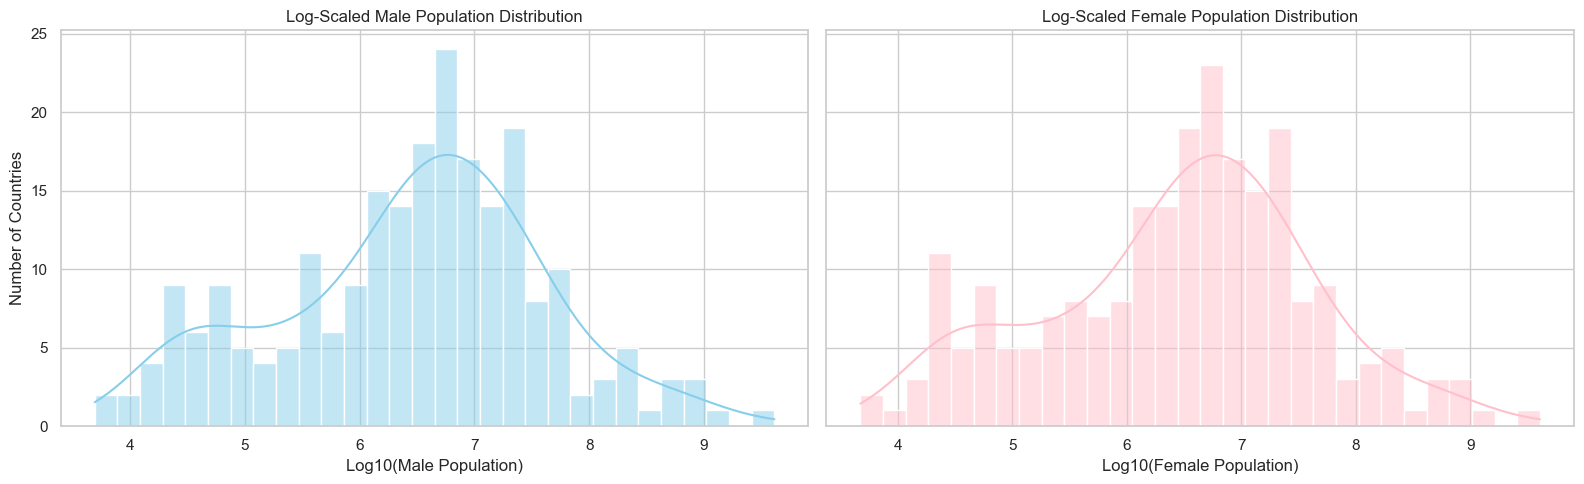

In [316]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Plot Male Population Histogram
sns.histplot(filtered['Log Male'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Log-Scaled Male Population Distribution')
axes[0].set_xlabel('Log10(Male Population)')
axes[0].set_ylabel('Number of Countries')

# Plot Female Population Histogram
sns.histplot(filtered['Log Female'], bins=30, kde=True, color='pink', ax=axes[1])
axes[1].set_title('Log-Scaled Female Population Distribution')
axes[1].set_xlabel('Log10(Female Population)')
axes[1].set_ylabel('')  

plt.tight_layout()
plt.show()

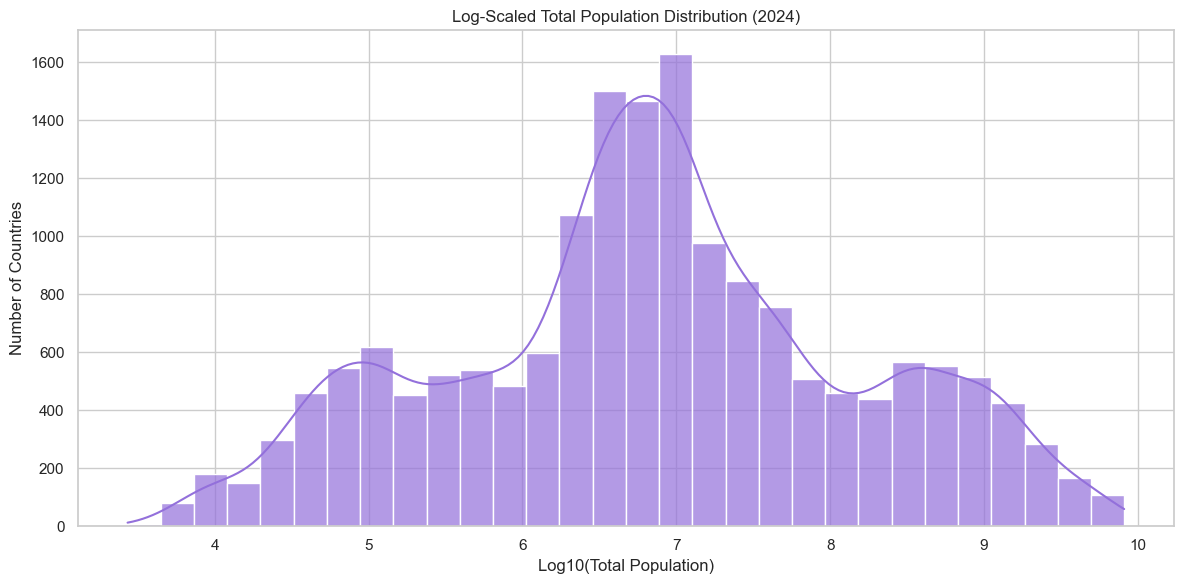

In [286]:
plt.figure(figsize=(12, 6))
sns.histplot(merged['Log Total Population'], bins=30, kde=True, color='mediumpurple', alpha=0.7)

plt.title('Log-Scaled Total Population Distribution (2024)')
plt.xlabel('Log10(Total Population)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from IPython.display import display, Markdown

display(Markdown("""
## Final Observations – Gender-wise Population Analysis

**Log-Scaled Population**  
- Helped manage the **wide range** in population data.  
- Made distributions more **interpretable** by minimizing the effect of extremely large values.  

**Total Population (2024)**  
- The data showed a **right-skewed distribution** — most countries have relatively **small populations**.  
- A few countries like **India** and **China** dominate the upper range.  

**Male vs Female Distributions**  
- Both genders followed **similar patterns** across countries.  
- Slight **regional variations** hint at possible **gender imbalances** in certain areas.  

**KDE Curves**  
- These **smoothened the histograms**, revealing cleaner trends.  
- Helped identify **natural clusters** in global population distribution.  

**Overall**  
- Most countries maintain a **balanced gender ratio**.  
- This sets a strong foundation for more advanced analysis on **regional trends**, **policy planning**, and **future forecasts**.
"""))




## Final Observations – Gender-wise Population Analysis

**Log-Scaled Population**  
- Helped manage the **wide range** in population data.  
- Made distributions more **interpretable** by minimizing the effect of extremely large values.  

**Total Population (2024)**  
- The data showed a **right-skewed distribution** — most countries have relatively **small populations**.  
- A few countries like **India** and **China** dominate the upper range.  

**Male vs Female Distributions**  
- Both genders followed **similar patterns** across countries.  
- Slight **regional variations** hint at possible **gender imbalances** in certain areas.  

**KDE Curves**  
- These **smoothened the histograms**, revealing cleaner trends.  
- Helped identify **natural clusters** in global population distribution.  

**Overall**  
- Most countries maintain a **balanced gender ratio**.  
- This sets a strong foundation for more advanced analysis on **regional trends**, **policy planning**, and **future forecasts**.
